

# Introducing the networkx



In [1]:
!pip install networkx
import networkx as nx

# Making the first Graph

In [2]:
G=nx.Graph()

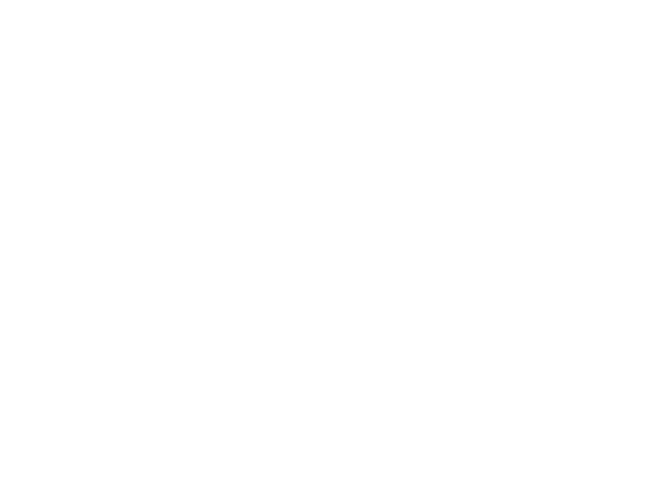

In [3]:
nx.draw(G)

In [4]:
G.add_node(1)

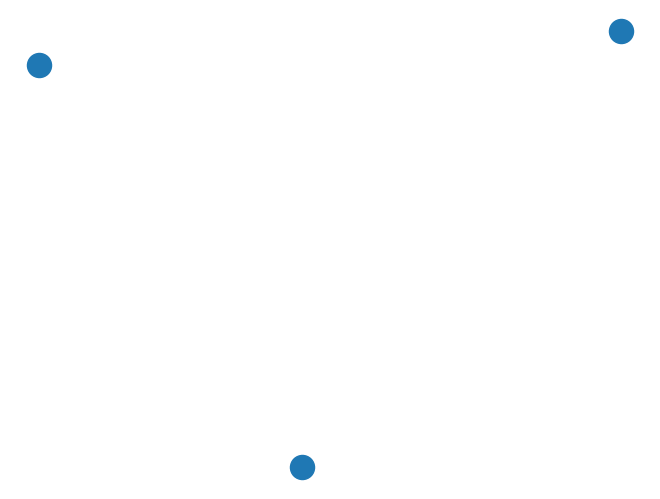

In [5]:
G.add_nodes_from([2,3])
nx.draw(G)

In [6]:
G.add_edge(1,2)

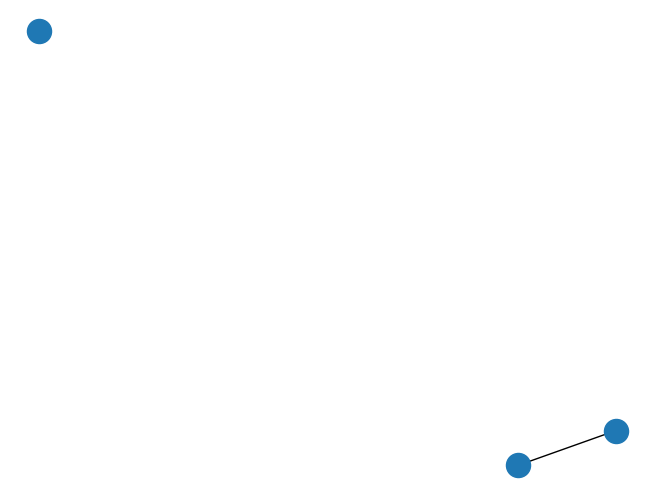

In [7]:
nx.draw(G)

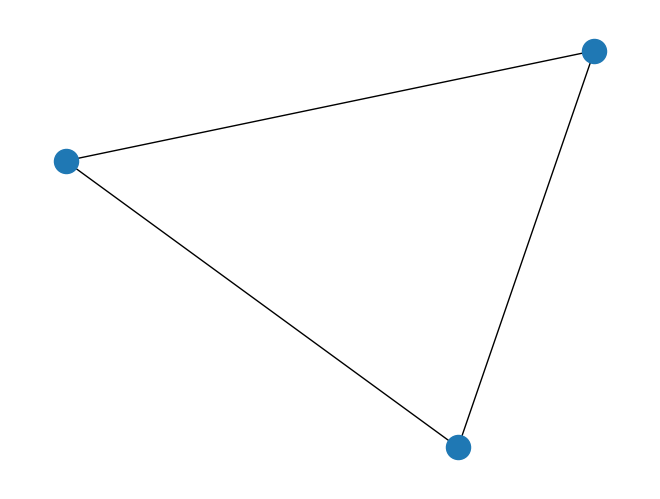

In [8]:
G.add_edges_from([(1,2),(2,3),(3,1)])
nx.draw(G)

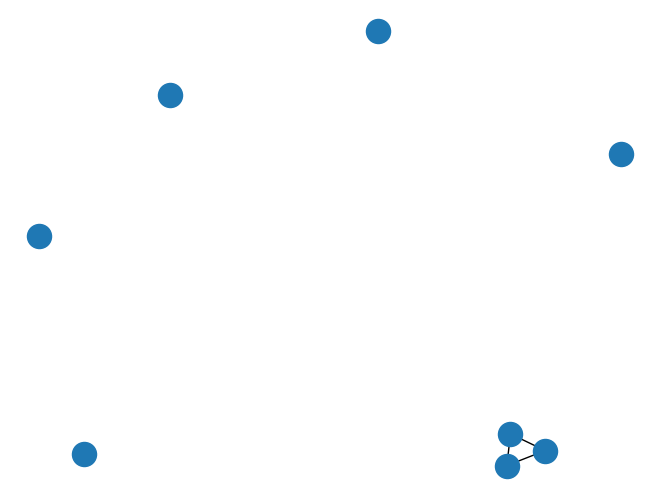

In [9]:
G.add_nodes_from([4,5,6,7,8])
nx.draw(G)

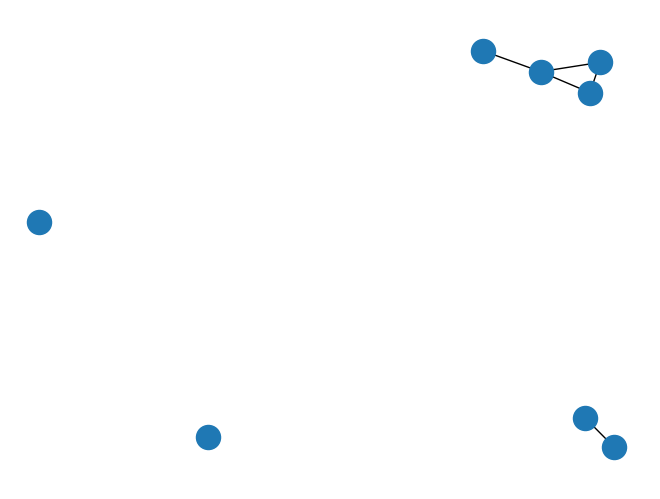

In [10]:
G.add_edges_from([(5,1),(6,7)])
nx.draw(G)

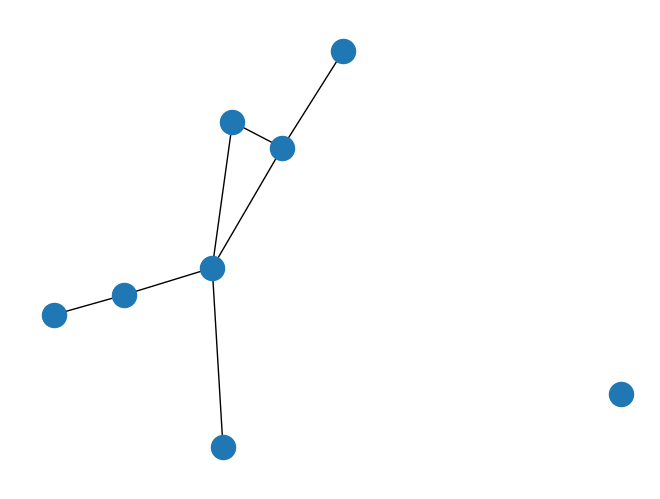

In [11]:
G.add_edges_from([(4,3),(7,3)])
nx.draw(G)

In [12]:
print(G.number_of_nodes())
print(G.number_of_edges())

8
7


In [13]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8))

In [14]:
G.edges

EdgeView([(1, 2), (1, 3), (1, 5), (2, 3), (3, 4), (3, 7), (6, 7)])

In [15]:
G.graph

{}

# JSON

In [16]:
from networkx.readwrite import json_graph
json_data=json_graph.node_link_data(G)
json_data

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8}],
 'links': [{'source': 1, 'target': 2},
  {'source': 1, 'target': 3},
  {'source': 1, 'target': 5},
  {'source': 2, 'target': 3},
  {'source': 3, 'target': 4},
  {'source': 3, 'target': 7},
  {'source': 6, 'target': 7}]}

In [17]:
json_graph=json_graph.node_link_graph(json_data)
json_graph

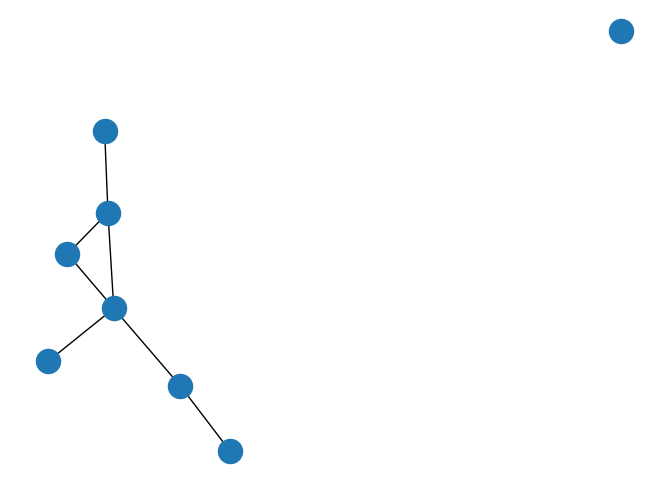

In [18]:
nx.draw(json_graph)

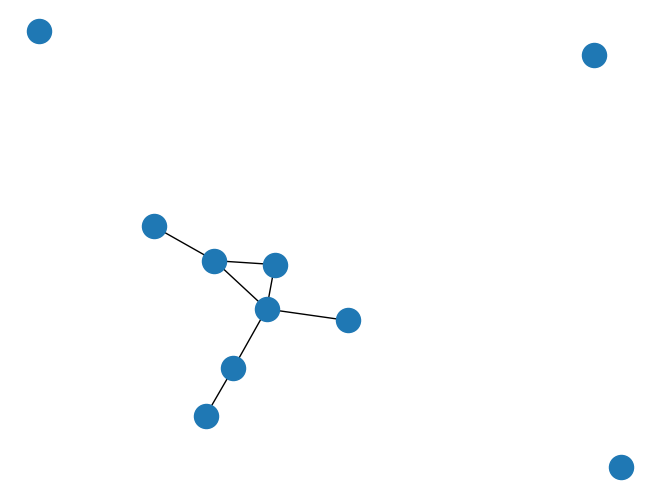

In [19]:
G=json_graph
G.add_nodes_from([9,10])
nx.draw(G)

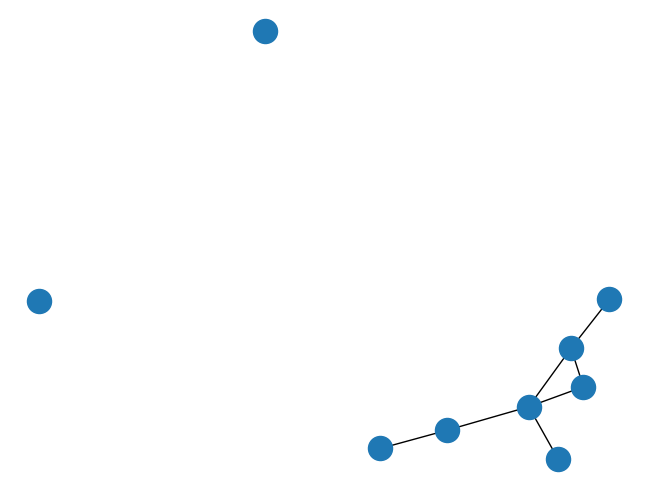

In [20]:
G.remove_node(10)
nx.draw(G)

In [21]:
G.order()

9

In [22]:
G.clear()

# Function

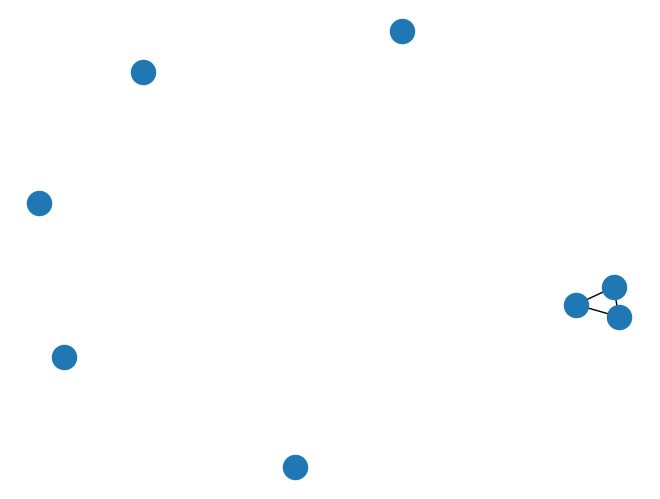

In [23]:
G.add_edges_from([(1,2),(2,3),(3,1)])
G.add_node('spam')
G.add_nodes_from('spam')
nx.draw(G)

In [24]:
from networkx.classes.function import density,degree,degree_histogram
print(density(G))
print(degree(G))
print(degree_histogram(G))

0.10714285714285714
[(1, 2), (2, 2), (3, 2), ('spam', 0), ('s', 0), ('p', 0), ('a', 0), ('m', 0)]
[5, 0, 3]


# Neighbors

In [25]:
from networkx.classes.function import neighbors
for node in G:
  print(node)
  print(list(G.neighbors(node)))

1
[2, 3]
2
[1, 3]
3
[2, 1]
spam
[]
s
[]
p
[]
a
[]
m
[]


# Path Graphs

False
False


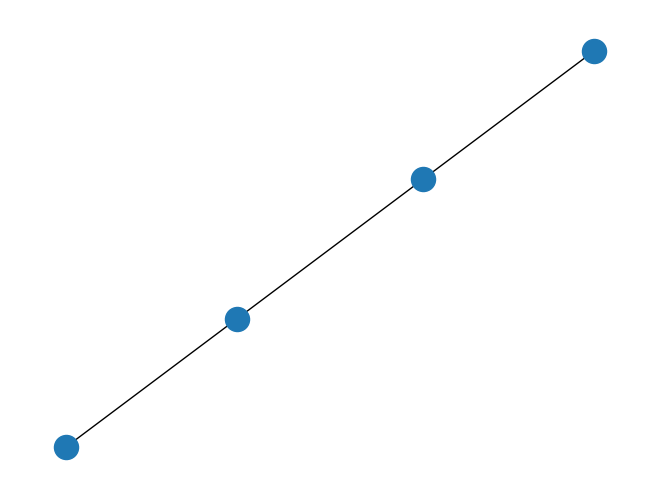

In [26]:
G=nx.path_graph(4)
nx.draw(G)
print(nx.is_weighted(G))
print(nx.is_directed(G))

# Directional Graphs

False
True
True
True


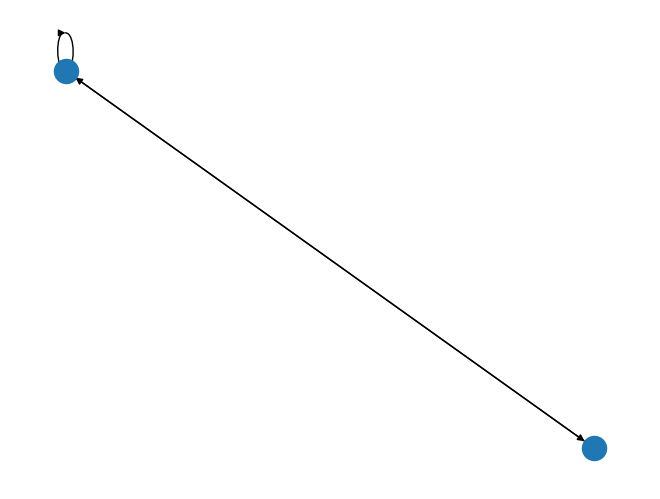

In [27]:
G=nx.DiGraph()
print(nx.is_weighted(G))
print(nx.is_directed(G))
G.add_edge(1,2,weight=2)
G.add_edge(2,1,weight=3)
G.add_edge(2,2,weight=3)
print(nx.is_weighted(G))
print(nx.is_directed(G))
nx.draw(G)

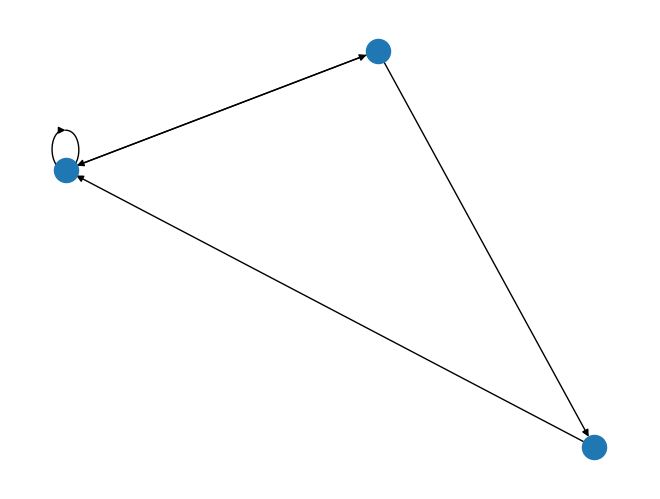

In [28]:
G.add_edges_from([(1,3),(3,2)])
nx.draw(G)

In [29]:
G.edges

OutEdgeView([(1, 2), (1, 3), (2, 1), (2, 2), (3, 2)])

In [30]:
G.nodes

NodeView((1, 2, 3))

In [31]:
for node in G.nodes:
  print(node)
  print(list(G.neighbors(node)))

1
[2, 3]
2
[1, 2]
3
[2]


In [32]:
G.number_of_nodes()

3

In [33]:
G.number_of_edges()

5

# Adjacency Matrix

In [34]:
A=nx.adjacency_matrix(G)
print(A.todense())

[[0 2 1]
 [3 3 0]
 [0 1 0]]


In [35]:
A.setdiag(A.diagonal()*2)
print(A.todense())

[[0 2 1]
 [3 6 0]
 [0 1 0]]


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [36]:
A=nx.to_numpy_array(G)
print(A)

[[0. 2. 1.]
 [3. 3. 0.]
 [0. 1. 0.]]


In [37]:
A.diagonal()

array([0., 3., 0.])

#MultiDirected Graph

[1, 2]
[(1, 2, 'a'), (1, 2, 'b')]
2
{1: {2: {'a': {'weight': 2}, 'b': {'weight': 3}}}, 2: {}}


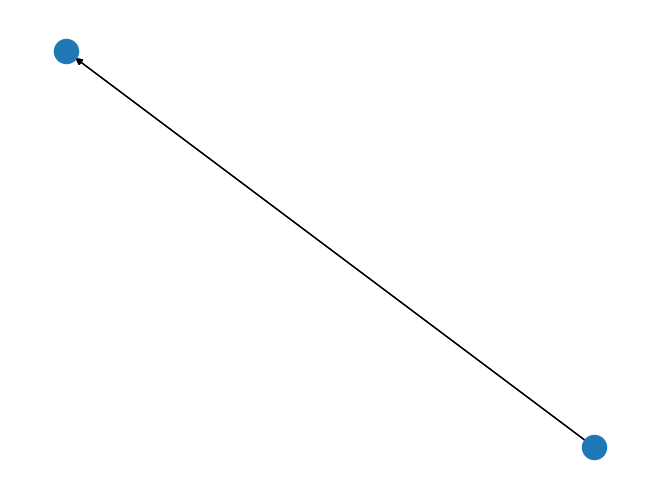

In [38]:
G=nx.MultiDiGraph()
G.add_edge(1,2,key='a',weight=2)
G.add_edge(1,2,key='b',weight=3)
nx.draw(G)
print(G.nodes)
print(G.edges)
d=nx.to_dict_of_dicts(G)
print(d[1][2]['a']['weight'])
print(d)

# Making the edge List

[('A', 'B'), ('C', 'D')]
['A', 'B', 'C', 'D']
  source target  cost  weight
0      A      B     5       6
1      C      D     4       7
[[0 6 0 0]
 [6 0 0 0]
 [0 0 0 7]
 [0 0 7 0]]


,source,target,cost,weight
0,A,B,5,6


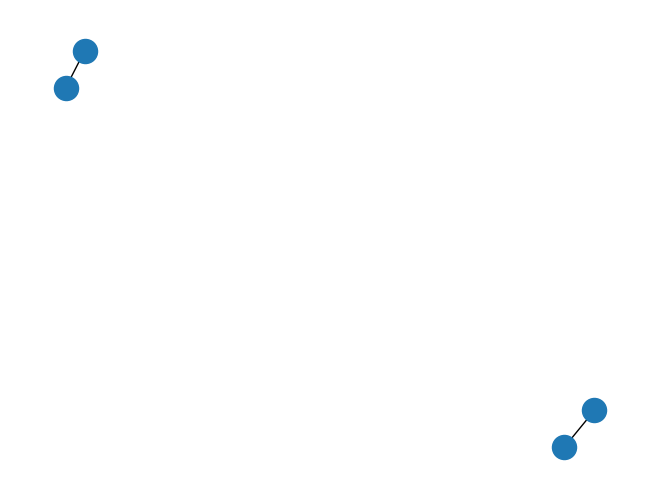

In [39]:
G=nx.Graph([('A','B',{'cost':5,'weight':6}),
 ('C','D',{'cost':4,'weight':7})
])
nx.draw(G)
print(G.edges)
print(G.nodes)
df=nx.to_pandas_edgelist(G)
print(df)
df=nx.to_pandas_edgelist(G,nodelist=['A','B'])
A=nx.adjacency_matrix(G)
print(A.todense())
df

# MultiGraph and Its edge List

['A', 'B']
[('A', 'B', 0), ('A', 'B', 1)]
  source target  cost
0      A      B     1
1      A      B     9
  source target  cost
0      A      B     1
1      A      B     9
[[0 2]
 [2 0]]


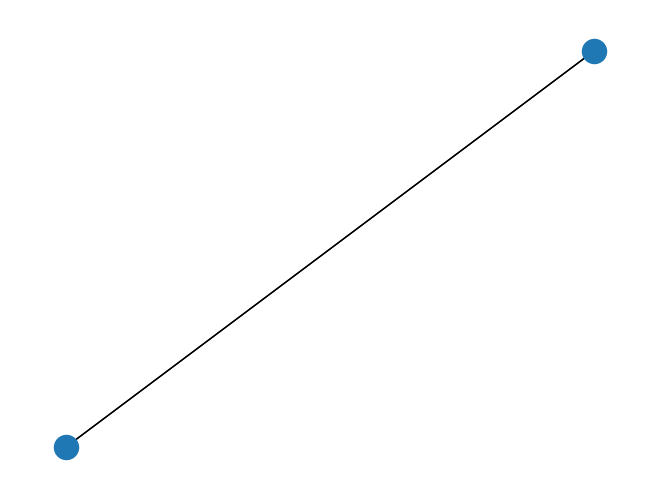

In [40]:
G=nx.MultiGraph()
G.add_edge('A','B',cost=1)
G.add_edge('A','B',cost=9)
# G.add_edge('A','B',cost=27)
nx.draw(G)
print(G.nodes)
print(G.edges)
df=nx.to_pandas_edgelist(G)
print(df)
df=nx.to_pandas_edgelist(G,nodelist=['A'])
print(df)
A=nx.adjacency_matrix(G)
print(A.todense())

# Sudoku Graph

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 18), (0, 27), (0, 36), (0, 45), (0, 54), (0, 63), (0, 72), (0, 10), (0, 11), (0, 19), (0, 20), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 10), (1, 19), (1, 28), (1, 37), (1, 46), (1, 55), (1, 64), (1, 73), (1, 9), (1, 11), (1, 18), (1, 20), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 11), (2, 20), (2, 29), (2, 38), (2, 47), (2, 56), (2, 65), (2, 74), (2, 9), (2, 10), (2, 18), (2, 19), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 12), (3, 21), (3, 30), (3, 39), (3, 48), (3, 57), (3, 66), (3, 75), (3, 13), (3, 14), (3, 22), (3, 23), (4, 5), (4, 6), (4, 7), (4, 8), (4, 13), (4, 22

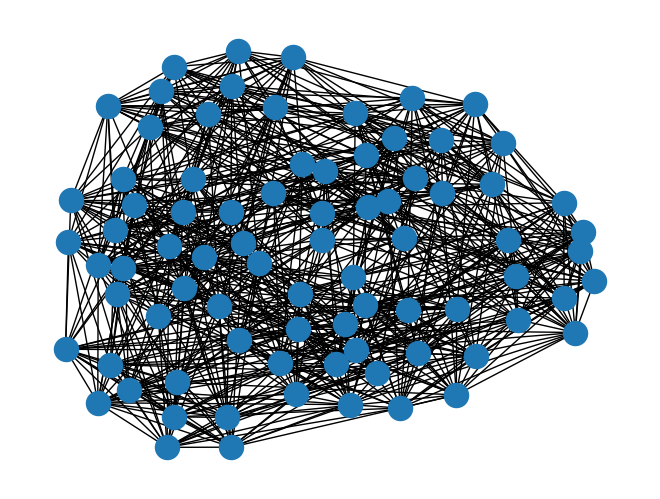

In [41]:
G=nx.sudoku_graph(3)
print(G.nodes)
print(G.edges)
nx.draw(G)
A=nx.adjacency_matrix(G)
print(A.todense())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 8), (0, 12), (0, 5), (1, 2), (1, 3), (1, 5), (1, 9), (1, 13), (1, 4), (2, 3), (2, 6), (2, 10), (2, 14), (2, 7), (3, 7), (3, 11), (3, 15), (3, 6), (4, 5), (4, 6), (4, 7), (4, 8), (4, 12), (5, 6), (5, 7), (5, 9), (5, 13), (6, 7), (6, 10), (6, 14), (7, 11), (7, 15), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (9, 10), (9, 11), (9, 13), (9, 12), (10, 11), (10, 14), (10, 15), (11, 15), (11, 14), (12, 13), (12, 14), (12, 15), (13, 14), (13, 15), (14, 15)]
[[0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0]
 [1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0]
 [1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0]
 [1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1]
 [1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0]
 [1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0]
 [0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0]
 [0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0]
 [0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0]
 [0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1]
 [0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1]
 [1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1]

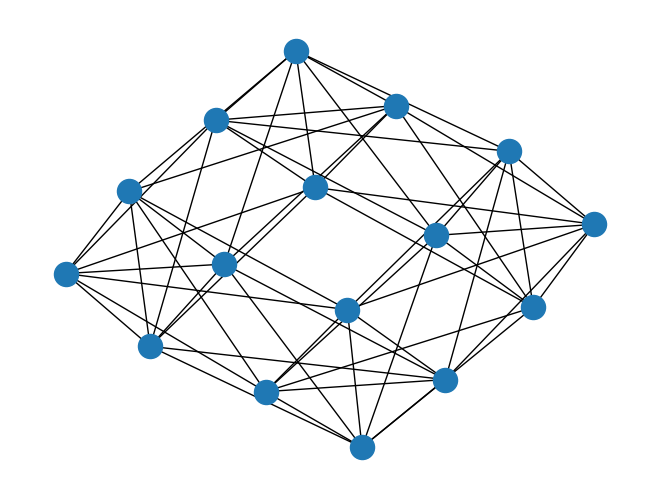

In [42]:
G=nx.sudoku_graph(2)
print(G.nodes)
print(G.edges)
nx.draw(G)
A=nx.adjacency_matrix(G)
print(A.todense())

# Grid Graph

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (0, 2, 0), (0, 2, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1), (1, 2, 0), (1, 2, 1), (2, 0, 0), (2, 0, 1), (2, 1, 0), (2, 1, 1), (2, 2, 0), (2, 2, 1), (3, 0, 0), (3, 0, 1), (3, 1, 0), (3, 1, 1), (3, 2, 0), (3, 2, 1)]
[((0, 0, 0), (1, 0, 0)), ((0, 0, 0), (0, 1, 0)), ((0, 0, 0), (0, 0, 1)), ((0, 0, 1), (1, 0, 1)), ((0, 0, 1), (0, 1, 1)), ((0, 1, 0), (1, 1, 0)), ((0, 1, 0), (0, 2, 0)), ((0, 1, 0), (0, 1, 1)), ((0, 1, 1), (1, 1, 1)), ((0, 1, 1), (0, 2, 1)), ((0, 2, 0), (1, 2, 0)), ((0, 2, 0), (0, 2, 1)), ((0, 2, 1), (1, 2, 1)), ((1, 0, 0), (2, 0, 0)), ((1, 0, 0), (1, 1, 0)), ((1, 0, 0), (1, 0, 1)), ((1, 0, 1), (2, 0, 1)), ((1, 0, 1), (1, 1, 1)), ((1, 1, 0), (2, 1, 0)), ((1, 1, 0), (1, 2, 0)), ((1, 1, 0), (1, 1, 1)), ((1, 1, 1), (2, 1, 1)), ((1, 1, 1), (1, 2, 1)), ((1, 2, 0), (2, 2, 0)), ((1, 2, 0), (1, 2, 1)), ((1, 2, 1), (2, 2, 1)), ((2, 0, 0), (3, 0, 0)), ((2, 0, 0), (2, 1, 0)), ((2, 0, 0), (2, 0, 1)), ((2, 0, 1), (3, 0, 1)), ((2, 0, 1), (2

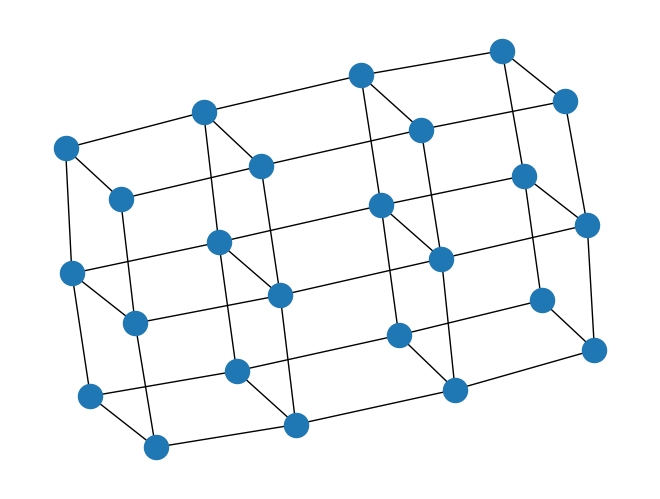

In [43]:
G=nx.grid_graph([2,3,4])
print(G.nodes)
print(G.edges)
A=nx.adjacency_matrix(G)
print(A.todense)
nx.draw(G)


[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
[((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((1, 0), (2, 0)), ((1, 0), (1, 1)), ((1, 1), (2, 1)), ((2, 0), (2, 1))]
<bound method _spbase.todense of <6x6 sparse array of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>>


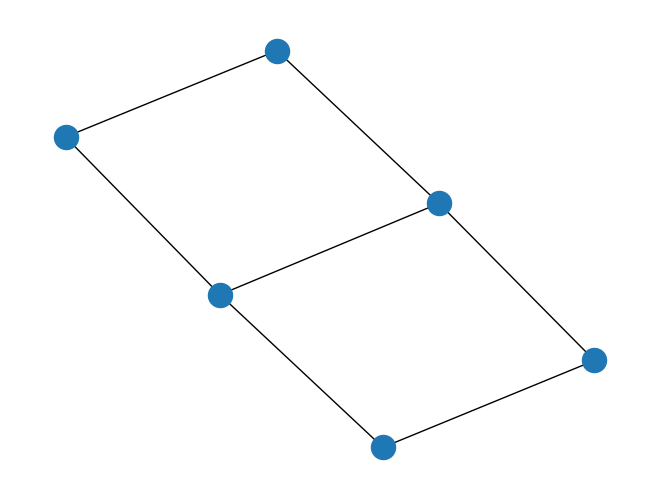

In [44]:
G=nx.grid_graph([2,3])
print(G.nodes)
print(G.edges)
A=nx.adjacency_matrix(G)
print(A.todense)
nx.draw(G)

[0, 1]
[(0, 1)]
<bound method _spbase.todense of <2x2 sparse array of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>>


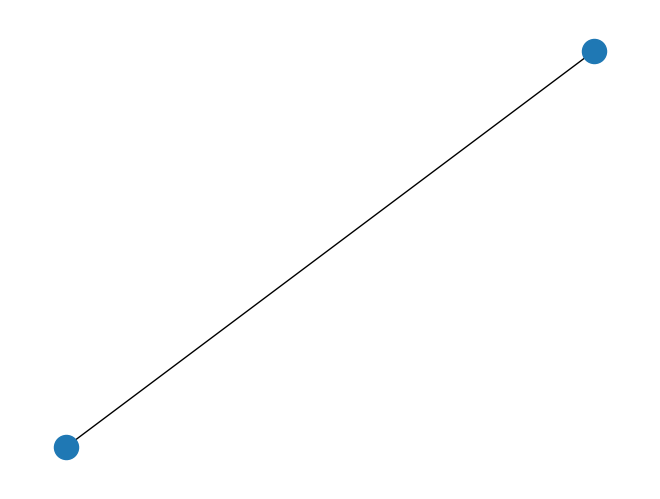

In [45]:
G=nx.grid_graph([2])
print(G.nodes)
print(G.edges)
A=nx.adjacency_matrix(G)
print(A.todense)
nx.draw(G)

# Introducing the PYG

In [46]:
import numpy as np

# Tensor

In [47]:
x=np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
print(x)
print(x.ndim)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
3


# Downloading PYG

In [48]:
! python -c "import torch; print(torch.version.cuda)"

12.1


In [49]:
! python -c "import torch; print(torch.__version__)"

2.1.0+cu121


In [50]:
!pip install torch-geometric
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.1.0+cu121.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 41.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 68.2 MB/s eta 0:00:00


In [51]:
import torch
from torch_geometric.data import Data

# DataSets

In [57]:
from torch_geometric.datasets import TUDataset
datasets=TUDataset(root='/temp/ENZYMES',name='ENZYMES')
print(datasets.num_classes)
print(len(datasets))
print(datasets.num_node_features)
print(datasets[0])

6
600
3
Data(edge_index=[2, 168], x=[37, 3], y=[1])


Data Nodes = ['Number of the Nodes','Node features']

Data Edges Index=['2','Number of the edges']

Data Edge features=['Number of the edges','one edge features']

Data y= [label of one data point]


# Plotting the Data Points

<class 'networkx.classes.digraph.DiGraph'>
<class 'torch_geometric.data.data.Data'>


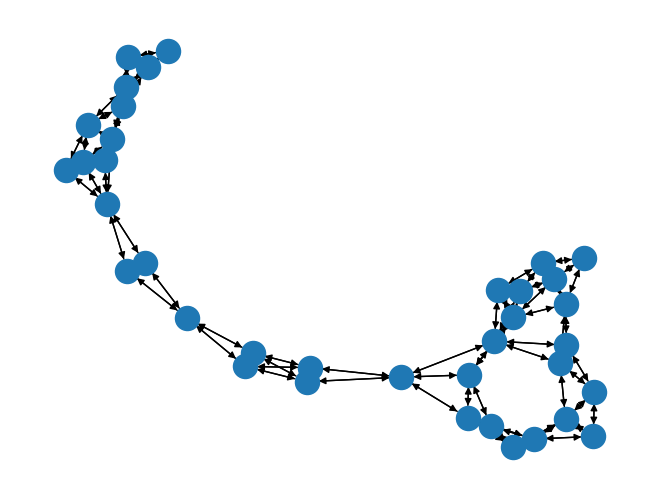

In [61]:
data=datasets[0];
from torch_geometric.utils import to_networkx
G=to_networkx(data)
print(type(G))
print(type(data))
nx.draw(G)

# Cora Dataset

In [62]:
from torch_geometric.datasets import Planetoid
Cora_datasets=Planetoid(root='/temp/Cora',name='Cora')
print(len(Cora_datasets))
print(Cora_datasets.num_classes)
print(Cora_datasets.num_node_features)

Processing...


1
7
1433


Done!


2708
10556
2708
10556


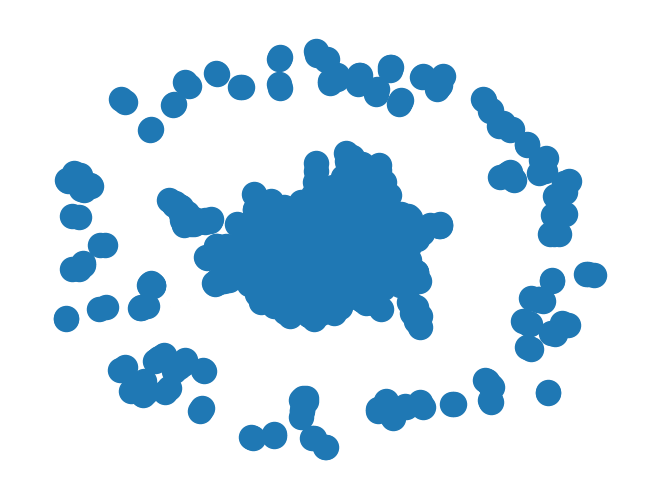

In [74]:
cds=Cora_datasets[0]
print(cds.num_nodes)
print(cds.num_edges)
from torch_geometric.utils import to_networkx
G=to_networkx(x)
nx.draw(G)
print(G.number_of_nodes())
print(G.number_of_edges())
# to big to see

In [85]:
nx.write_graphml(G,'G_ex.graphml')
nx.write_gexf(G,'G_ex.gexf')
print(cds.x.shape)
print(cds.is_directed())

torch.Size([2708, 1433])
False


In [76]:
cds.x[:1].shape
cds.x[:5].shape

torch.Size([5, 1433])

In [77]:
cds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [78]:
cds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [80]:
print(cds.train_mask.sum().item())
print(cds.test_mask.sum().item())
print(cds.val_mask.sum().item())

140
1000
500


In [83]:
print(cds.x[0].shape)
type(cds.x[0])

torch.Size([1433])


torch.Tensor